In [2]:
pip install gym==0.17.3

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-fuzzy

In [4]:
pip install pygame

In [5]:
# import libraries
import gym
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [6]:
# define the first input, (position of the car)
position = ctrl.Antecedent(np.arange(-1.2, 0.6+0.1, 0.1), 'position')

# define the second input, (velocity of the car)
velocity = ctrl.Antecedent(np.arange(-0.07, 0.07, 0.01), 'velocity')

# define the output (action)
action = ctrl.Consequent(np.arange(-1, 1+0.1, 0.1), 'action')

In [7]:
# split the inputs and output into 6 states
states_position = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
states_velocity = ['VL', 'L', 'M', 'H', 'VH']
states_action   = ['VL', 'L', 'M', 'H', 'VH']

# automatically divide the range on the sates (equally)
position.automf(names = states_position)
velocity.automf(names = states_velocity)
action.automf  (names = states_action  )

E:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


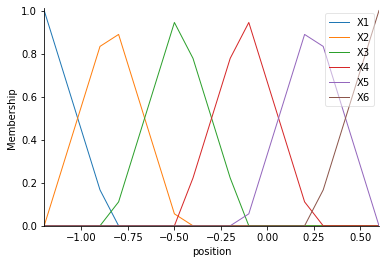

In [34]:
position.view()

In [8]:
# Defining rules

# if the car is on the left side of the curve ==> high speed (give the car a push)
rule1 = ctrl.Rule((position['X1'] | position['X2']) , action['VH'])

# if the car is trying to reach the top (x3, x4) and the velocity is low or very low ==> very low (cause it will return back)
rule2 = ctrl.Rule((position['X3']) & (velocity['L'] | velocity['VL']), action['VL'])
rule3 = ctrl.Rule((position['X4']) & (velocity['L'] | velocity['VL']), action['VL'])

# if the car is trying to reach the top (x3, x4) and the velocity is high or very high ==> very high (help the car to climb)
rule4 = ctrl.Rule((position['X3']) & (velocity['H'] | velocity['VH']), action['VH'])
rule5 = ctrl.Rule((position['X4']) & (velocity['H'] | velocity['VH']), action['VH'])

# if the car is near to the top (x5, x6) ==> very high  (help the car to climb)
rule6 = ctrl.Rule((position['X5'] | position['X6']), action['VH'])

In [9]:
# define a control system based on the rules
action_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

In [10]:
# make a simulation object from the control system we made
car_ctrl = ctrl.ControlSystemSimulation(action_ctrl)

In [11]:
# define a function to compute the output according to the given inputs
def get_action(state, car_ctrl):
    
    # get the position of the car
    car_ctrl.input['position'] = state[0]
    # get the velocity of the car
    car_ctrl.input['velocity'] = state[1]
    
    # compute the action
    car_ctrl.compute()
    
    # return the output
    return [car_ctrl.output['action']]

In [25]:
# creating an object ot use it as the Mountain Car environment
environment = gym.envs.make("MountainCarContinuous-v0") 

# max number of steps
steps_num = 500


In [16]:
import time

In [36]:
# Final function to render to env and take actions
def run_render(environment, car_ctrl, steps_num):
    
    # get initial state
    state = environment.reset()
    
    # done is false
    done = False
    
    # to store the given reward
    total_reward = 0
    
    # to store the rewards
    rewards = []
    
    # iterate over the steps
    for step in range(steps_num):
        
        # render
        environment.render()
        
        # slepp, so we can see the output
        time.sleep(0.1)
        
        # get an action from the controller according on the given state
        action = get_action(state, car_ctrl)
        
        # get the next state, reward, and the stopping cond 'done'
        next_state, reward, done, _ = environment.step(action)
        
        # print the reward we gain
        print('reward     : ', reward)
        
        # print the next state
        print('next_state : ', next_state)
        
        # print step number
        print('step number: ', step)
        
        # calculate the total reward
        total_reward += reward
        
        # add the new reward to rewards
        rewards.append(reward)
        
        # move to the next state
        state = next_state
        
        # if the stopping cond is satisfied, break the loop
        if done:
            # sleep for 5 secs so i can take a screenshot 
            time.sleep(5)
            
            # close the window
            environment.close()
            break
    # print final results
    print('number of steps: ', step, '\nfinal reward   : ', reward, '\ntotal reward   : ', total_reward)
    return rewards

In [37]:
# run 
rewards = run_render(environment, car_ctrl, steps_num)

reward     :  -0.05705317447685098
next_state :  [-0.47661071  0.00078761]
step number:  0
reward     :  -0.05704503386669083
next_state :  [-0.47504143  0.00156929]
step number:  1
reward     :  -0.05708735596288457
next_state :  [-0.47270169  0.00233974]
step number:  2
reward     :  -0.05749580406173448
next_state :  [-0.46960481  0.00309688]
step number:  3
reward     :  -0.0578953020320184
next_state :  [-0.46576979  0.00383503]
step number:  4
reward     :  -0.058282826665689194
next_state :  [-0.46122116  0.00454863]
step number:  5
reward     :  -0.058655498973037526
next_state :  [-0.45598883  0.00523233]
step number:  6
reward     :  -0.059010614605716785
next_state :  [-0.45010783  0.005881  ]
step number:  7
reward     :  -0.059345670477661955
next_state :  [-0.44361802  0.00648981]
step number:  8
reward     :  -0.05965838681352345
next_state :  [-0.43656374  0.00705428]
step number:  9
reward     :  -0.05994672401828388
next_state :  [-0.42899346  0.00757029]
step number:

In [40]:
# plot rewards
def plot_rewards(rewards):
    plt.figure(figsize=(15, 8))
    xticks = len(rewards)       
    plt.plot(range(1,xticks+1), rewards)        
    plt.xlabel('Steps')
    plt.ylabel('Rewards')
    plt.show()

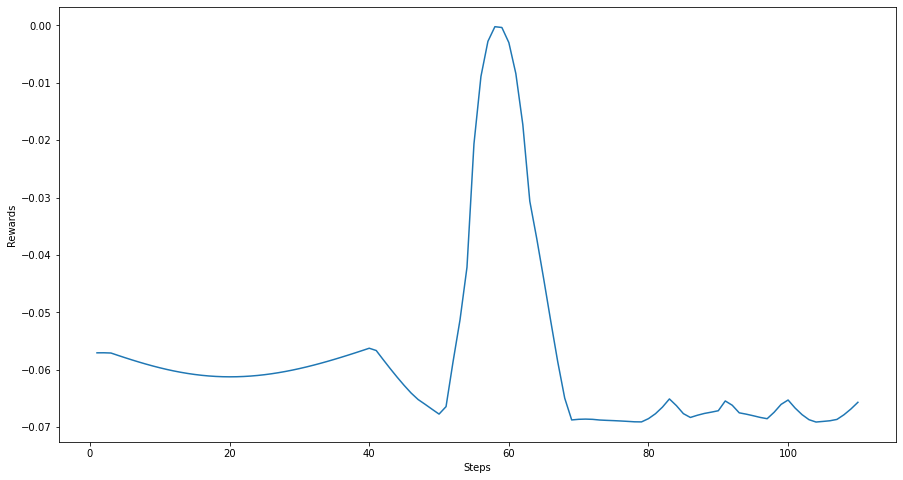

In [41]:
# plot Without the final reward
plot_rewards(rewards[:-1])

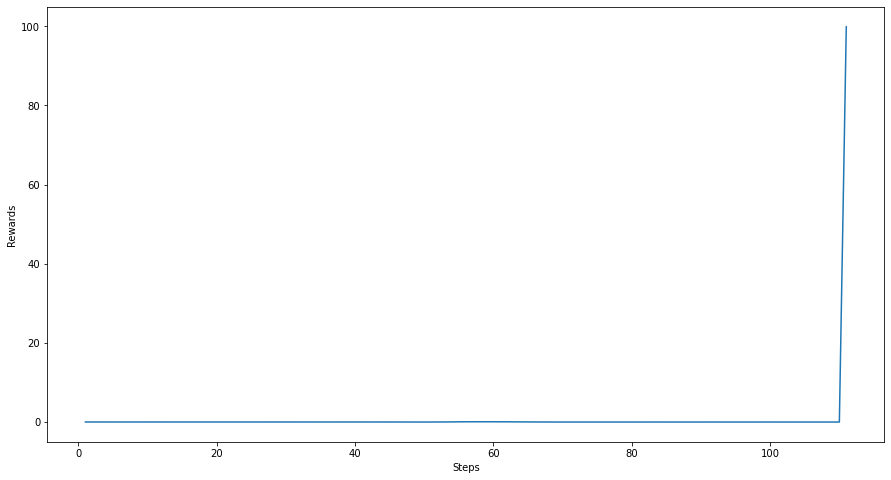

In [42]:
# plot With the final reward
plot_rewards(rewards)